In [18]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset

## Info

This document shows examples of how to use the EXPORTSNA_profiles.nc file, collated by Zachary Erickson (email: zachary.k.erickson@noaa.gov) to provide one file with all of the profile data from the EXPORTS North Atlantic (EXPORTSNA) field deployment.

Information on how this dataset was combined can be found at: https://github.com/zacharykerickson/EXPORTS_analyses/blob/main/consolidate_data.ipynb

The dataset itself can be found at (may need to request permission): https://drive.google.com/file/d/1SmBbt9G1jlz8o7iZ9sdc62tAl_4tFgqw

In [45]:
fn = 'EXPORTSNA_profiles.nc'
nc = Dataset(fn,'r')
print('Variables: ',list(nc.variables.keys()),end='\n\n')

Variables:  ['ID', 'time', 'lat', 'lon', 'station', 'depth', 'CT', 'SA', 'fChl', 'bbp700', 'oxy']



In [20]:
print('-- ID labels --')
IDlist = [s.split(': ')[1] for s in nc.variables['ID'].units.split(', ')]
for ID,label in enumerate(IDlist):
    print(ID,':',label)

-- ID labels --
0 : DY_131
1 : JC_214
2 : SdG_2015
3 : SG_219
4 : SG_237
5 : SL_305
6 : BGC_303
7 : BGC_304


/Users/erickson/.conda/envs/zke/lib/python3.9/site-packages/IPython/core/pylabtools.py:137: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


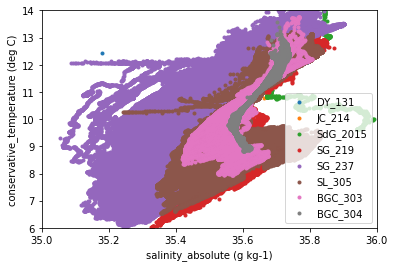

In [4]:
# plot all T/S, labeled by platform
for ID,label in enumerate(IDlist):
    inds = nc.variables['ID'][:]==ID
    plt.scatter(nc.variables['SA'][inds],nc.variables['CT'][inds],marker='.',label=label)
plt.legend()
plt.xlim([35,36])
plt.ylim([6,14])
plt.xlabel('%s (%s)'%(nc.variables['SA'].longname,nc.variables['SA'].units))
plt.ylabel('%s (%s)'%(nc.variables['CT'].longname,nc.variables['CT'].units));

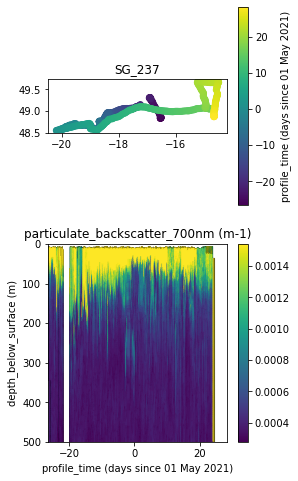

In [48]:
# plot one platform
ID = 4
VAR = 'bbp700'

inds = nc.variables['ID'][:]==ID
fig = plt.figure(figsize=(4,8))
plt.subplot(211)
plt.plot(nc.variables['lon'][inds],nc.variables['lat'][inds],c='k',zorder=-1)
plt.scatter(nc.variables['lon'][inds],nc.variables['lat'][inds],c=nc.variables['time'][inds])
plt.colorbar(label='%s (%s)'%(nc.variables['time'].longname,nc.variables['time'].units))
plt.title(IDlist[ID])
LATITUDE = 49
plt.gca().set_aspect(1/np.cos(LATITUDE*np.pi/180))
plt.subplot(212)
vmin,vmax = np.nanpercentile(nc.variables[VAR][inds],[5,95])
plt.pcolormesh(nc.variables['time'][inds],nc.variables['depth'][:],nc.variables[VAR][inds].T,
               shading='gouraud',vmin=vmin,vmax=vmax)
plt.xlabel('%s (%s)'%(nc.variables['time'].longname,nc.variables['time'].units))
plt.ylabel('%s (%s)'%(nc.variables['depth'].longname,nc.variables['depth'].units))
plt.ylim([500,0])
plt.colorbar()
plt.title('%s (%s)'%(nc.variables[VAR].longname,nc.variables[VAR].units));

/Users/erickson/.conda/envs/zke/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


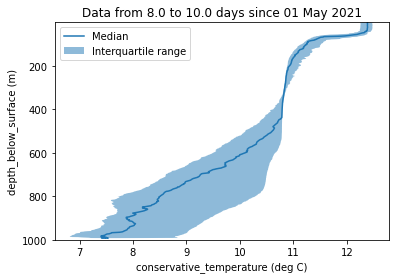

In [55]:
# plot profile envelope for a given variable over a date range
time_min = 8
time_max = 10
VAR = 'CT'

inds = (nc.variables['time'][:]>time_min) & (nc.variables['time'][:]<time_max)
low,median,high = np.nanpercentile(nc.variables[VAR][inds],[25,50,75],axis=0)
plt.plot(median,nc.variables['depth'][:],label='Median')
plt.fill_betweenx(nc.variables['depth'][:],low,high,alpha=0.5,label='Interquartile range')
plt.xlabel('%s (%s)'%(nc.variables[VAR].longname,nc.variables[VAR].units))
plt.ylabel('%s (%s)'%(nc.variables['depth'].longname,nc.variables['depth'].units))
plt.ylim(nc.variables['depth'][[-1,0]])
plt.title('Data from %.1f to %.1f %s'%(time_min,time_max,nc.variables['time'].units));
plt.legend();

In [56]:
nc.close()